In [ ]:
from data_loader import FootballDataLoader  # adjust import if needed
import pandas as pd
import numpy as np
import os


In [ ]:

# === Setup ===
data_dir = "/Users/denizadiguzel/FootballData_FromMathias_May2025/RestructuredData_2425"
game_file = "Game_FCK_AAB_Score_2_0_Day_2024-09-23Z.pkl"  # sample game that exists in both

# === Load from FCK perspective ===
loader_fck = FootballDataLoader(data_dir, "FCK")
fck_time, fck_ball, fck_team, fck_opp = loader_fck.load_sec_game(game_file)

# === Load from AAB perspective ===
loader_aab = FootballDataLoader(data_dir, "AAB")
aab_time, aab_ball, aab_team, aab_opp = loader_aab.load_sec_game(game_file)

# === Investigate who is "self.team" and "Opp" in each ===
print("FCK loader: shape of FCK (self.team) =", np.array(fck_team).shape)
print("FCK loader: shape of Opponent =", np.array(fck_opp).shape)
print("AAB loader: shape of AAB (self.team) =", np.array(aab_team).shape)
print("AAB loader: shape of Opponent =", np.array(aab_opp).shape)

# === Compare identities ===
print("\nFirst 3 player jersey numbers (FCK loader):", [int(row[4]) for row in fck_team[0][:3]])
print("First 3 player jersey numbers (AAB loader):", [int(row[4]) for row in aab_opp[0][:3]])  # this should match above

print("\nFirst 3 player jersey numbers (AAB loader as team):", [int(row[4]) for row in aab_team[0][:3]])
print("First 3 player jersey numbers (FCK loader as opponent):", [int(row[4]) for row in fck_opp[0][:3]])  # this should match above

# === Investigate flipping of coordinates ===
print("\nSample coordinates from FCK team frame 0:", fck_team[0][:3, :2])
print("Sample coordinates from AAB opponent frame 0:", aab_opp[0][:3, :2])  # should match if same

print("\nSample coordinates from AAB team frame 0:", aab_team[0][:3, :2])
print("Sample coordinates from FCK opponent frame 0:", fck_opp[0][:3, :2])  # should match if same

# === Investigate time structure ===
print("\nTime array (first 5 entries):")
print("FCK:", fck_time[:5])
print("AAB:", aab_time[:5])

# === Optional: Flip test for second half ===
half_fck = [h[1] for h in fck_time]
half_aab = [h[1] for h in aab_time]
print("\nHalf switches (FCK):", np.unique(half_fck, return_counts=True))
print("Half switches (AAB):", np.unique(half_aab, return_counts=True))


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from data_loader import FootballDataLoader  # Adjust if your import path is different

# === Load game from FCK's perspective ===
data_dir = "/Users/denizadiguzel/FootballData_FromMathias_May2025/RestructuredData_2425"
loader = FootballDataLoader(data_dir, "FCK")

# Load 1 game with real jersey numbers (no artificial mapping)
df = loader.scrape_game(
    filename="Game_FCK_AAB_Score_2_0_Day_2024-09-23Z.pkl"
)

# Identify which half each frame is in
half_col = df["half"].values
half1_mask = half_col == 1
half2_mask = half_col == 2

# Choose a stable home player to test — change number if missing
player_col = "FCKplayer_1_x"
if player_col not in df.columns:
    print(f"{player_col} not found in this match.")
else:
    # Extract x-positions in each half
    x1 = df.loc[half1_mask, player_col].dropna()
    x2 = df.loc[half2_mask, player_col].dropna()

    # Print mean and std
    print(f"\n{player_col} average x-position:")
    print(f"  1st half: {x1.mean():.2f} ± {x1.std():.2f}")
    print(f"  2nd half: {x2.mean():.2f} ± {x2.std():.2f}")
    print(f"  Sides switched: {'YES' if np.sign(x1.mean()) != np.sign(x2.mean()) else 'NO'}")

    # Plot histogram for visual comparison
    plt.hist(x1, bins=50, alpha=0.6, label="1st Half")
    plt.hist(x2, bins=50, alpha=0.6, label="2nd Half")
    plt.axvline(x1.mean(), color="blue", linestyle="--", label="Mean H1")
    plt.axvline(x2.mean(), color="orange", linestyle="--", label="Mean H2")
    plt.title(f"X-position Distribution: {player_col}")
    plt.xlabel("x-coordinate")
    plt.ylabel("Frequency")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()


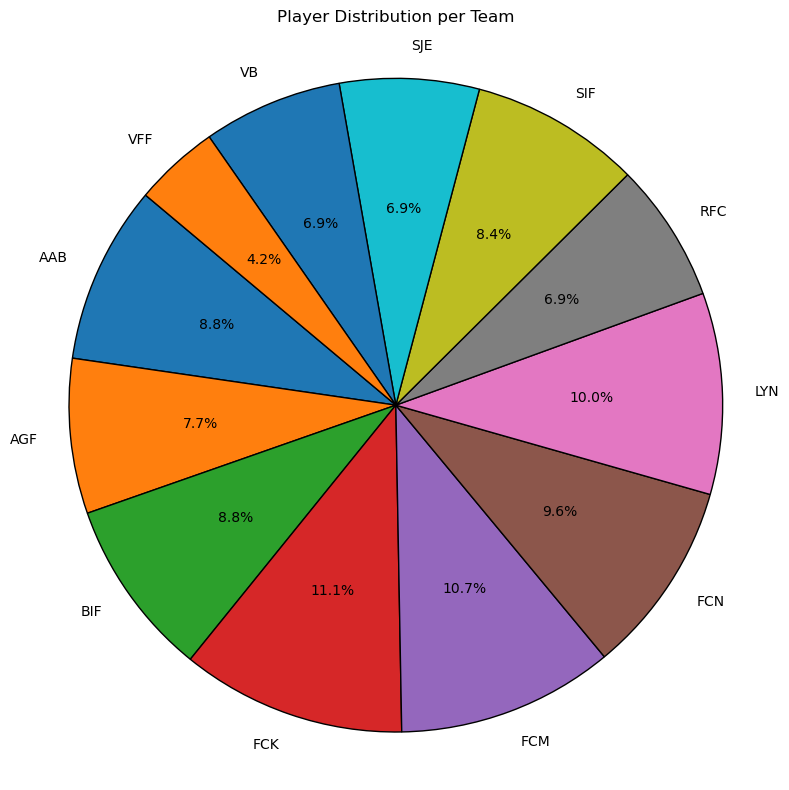

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv("/Users/denizadiguzel/player_cluster_assignments.csv")

# Extract team name from label (e.g., "FCK_11" → "FCK")
df["team"] = df["label"].str.extract(r"^([A-Z]+)_")

# Count players per team
team_counts = df["team"].value_counts().sort_index()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(team_counts, labels=team_counts.index, autopct="%1.1f%%", startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title("Player Distribution per Team")
plt.axis("equal")  # Equal aspect ratio ensures the pie is a circle.
plt.tight_layout()
plt.show()
